In [1]:
from pathlib import Path
import tifffile
import miguel_tools as mt
import iTools as iT
import datetime
from skimage import filters
import napari
import pandas as pd
from collections import defaultdict
import math
from scipy.spatial import distance
from matplotlib import pyplot as plt
import numpy as np
from tkinter import filedialog
from tkinter import *
import seaborn as sns
import pandas as pd
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
def ask_folder():
    root = Tk()
    root.withdraw()
    folder_selected = filedialog.askdirectory()
    folder_selected = Path(folder_selected)
    return folder_selected


In [3]:
print("Choose the folder where the results of all seedlings are stored\n")

seedling_results = ask_folder()

Choose the folder where the results of all seedlings are stored



In [4]:
excels = sorted(list(seedling_results.glob("*/*")))
excels = [Path(i) for i in excels]
names = ["{}_{}".format(excels[i].parent.name, excels[i].stem) for i in range(len(excels))]
names

['++_Plate1_seedling_2',
 '++_Plate1_seedling_3',
 '++_Plate1_seedling_4',
 '++_Plate2_seedling_2',
 '++_Plate2_seedling_6',
 '++_Plate3_seedling_1',
 '++_Plate3_seedling_4',
 '++_Plate3_seedling_5',
 '++_Plate4_seedling_1',
 '++_Plate4_seedling_2',
 '++_Plate4_seedling_6',
 '++_Plate5_seedling_5',
 '++_Plate6_seedling_2',
 '++_Plate6_seedling_5',
 '++_Plate6_seedling_6',
 '++_Plate7_seedling_4',
 '++_Plate7_seedling_6',
 '++_Plate8_seedling_1',
 '++_Plate8_seedling_3',
 'm+_Plate1_seedling_1',
 'm+_Plate1_seedling_5',
 'm+_Plate1_seedling_6',
 'm+_Plate2_seedling_3',
 'm+_Plate2_seedling_5',
 'm+_Plate3_seedling_2',
 'm+_Plate3_seedling_3',
 'm+_Plate3_seedling_6',
 'm+_Plate4_seedling_3',
 'm+_Plate4_seedling_4',
 'm+_Plate4_seedling_5',
 'm+_Plate5_seedling_1',
 'm+_Plate5_seedling_4',
 'm+_Plate5_seedling_6',
 'm+_Plate6_seedling_4',
 'm+_Plate7_seedling_1',
 'm+_Plate7_seedling_2',
 'm+_Plate7_seedling_5',
 'm+_Plate8_seedling_6',
 'mm_Plate7_seedling_3',
 'mm_Plate8_seedling_2',


In [10]:
DFs = [pd.ExcelFile(i).parse("degrees", index_col=0) for i in excels]
DATA = [pd.ExcelFile(i).parse("raw_data", index_col=0) for i in excels]

for ix in range(len(DFs)):
    DFs[ix].insert(loc=0, column='experiment', value=names[ix])
    DATA[ix].insert(loc=0, column='experiment', value=names[ix])
    
DF_degrees = pd.concat(DFs)
DF_data = pd.concat(DATA)

DF_degrees['caps'] = DF_degrees['caps'].apply(lambda x: "-".join([x.split("-")[0].zfill(3), x.split("-")[1].zfill(3)]))
DF_data['cap'] = DF_data['cap'].apply(lambda x: str(x).zfill(3))
# DF_data['hours'] = DF_data.time.apply(lambda x: x.strftime("%H:%M:%S"))

In [11]:
timepoints = DF_data[DF_data.cap.isin(DF_degrees.caps.apply(lambda x: x.split("-")[-1]))].reset_index()['time']

In [12]:
DF_degrees.insert(loc=2, column='timepoints', value=timepoints)
# DF_degrees.timepoints = DF_degrees.timepoints.apply(lambda x: x.strftime('%H:%M:%S'))

In [ ]:
DF_degrees.insert(loc=0, column='type', value=DF_degrees.experiment.apply(lambda x: x.split("_")[0]))
# DF_degrees.insert(loc=0, column='ntype', value=DF_degrees.experiment.apply(lambda x: x.split("_")[1]))

In [35]:
savein = seedling_results.parent / "{}.xlsx".format(seedling_results.stem.replace(" ", "_"))
print(savein)
mt.writting_excel([DF_data, DF_degrees], pathname=savein, sheet_name=['data', 'degrees'])

D:\TEMP_PICTURES\Lichun\Excel_Results_by_genotype.xlsx


WindowsPath('D:/TEMP_PICTURES/Lichun/Excel_Results_by_genotype.xlsx')

In [14]:
DF_degrees.head()

,type,experiment,caps,timepoints,y_degrees_label,x_degrees_label,degree,euclidean (mm),time_dif (s),speed (mm/s),speed (mm/h)
0,++,++_Plate1_seedling_2,000-001,2020-12-18 14:09:28,184.952204,475.622650,-30.963757,0.047859,1200,0.000040,0.143576
1,++,++_Plate1_seedling_2,001-002,2020-12-18 14:29:28,184.310361,476.793071,-26.565051,0.048941,1200,0.000041,0.146824
2,++,++_Plate1_seedling_2,002-003,2020-12-18 14:49:28,184.536894,477.812469,51.842773,0.048711,1200,0.000041,0.146134
3,++,++_Plate1_seedling_2,003-004,2020-12-18 15:09:29,186.047114,479.133912,47.290610,0.096806,1201,0.000081,0.290177
4,++,++_Plate1_seedling_2,004-005,2020-12-18 15:29:29,187.406312,480.493110,39.805571,0.042736,1200,0.000036,0.128209


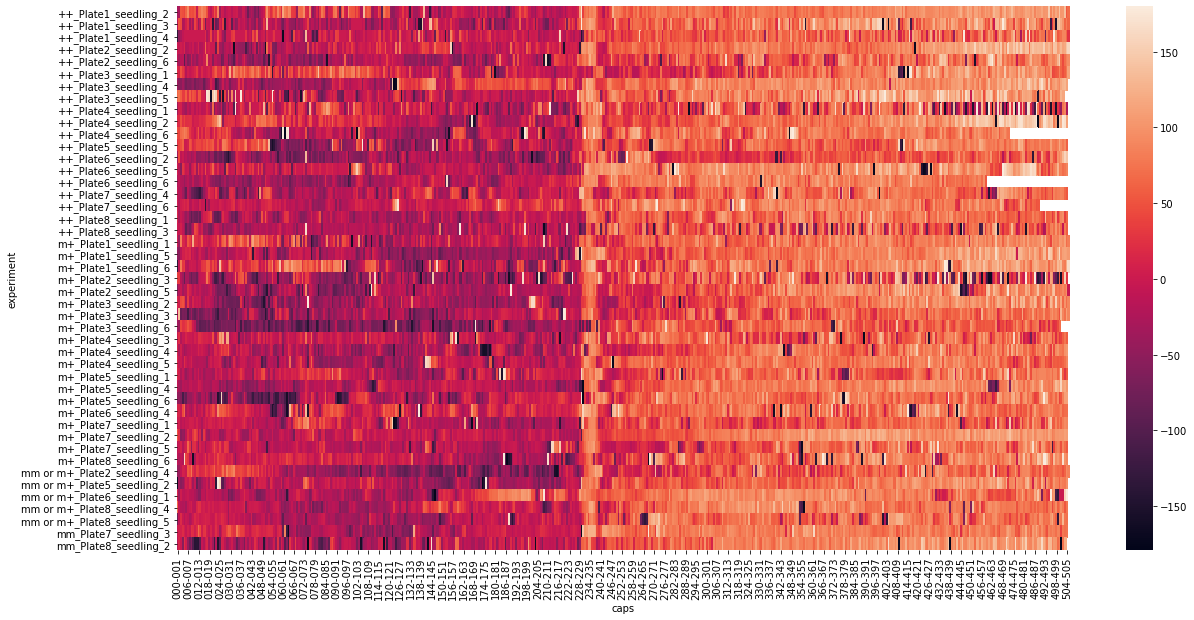

In [15]:
import seaborn as sns
import matplotlib.dates as md


plt.figure(figsize=(20,10))
flights = DF_degrees.pivot("experiment", "caps", "degree")
ax = sns.heatmap(flights)
plt.savefig(seedling_results / "heatmap_caps.png", dpi=300, bbox_inches = 'tight')    

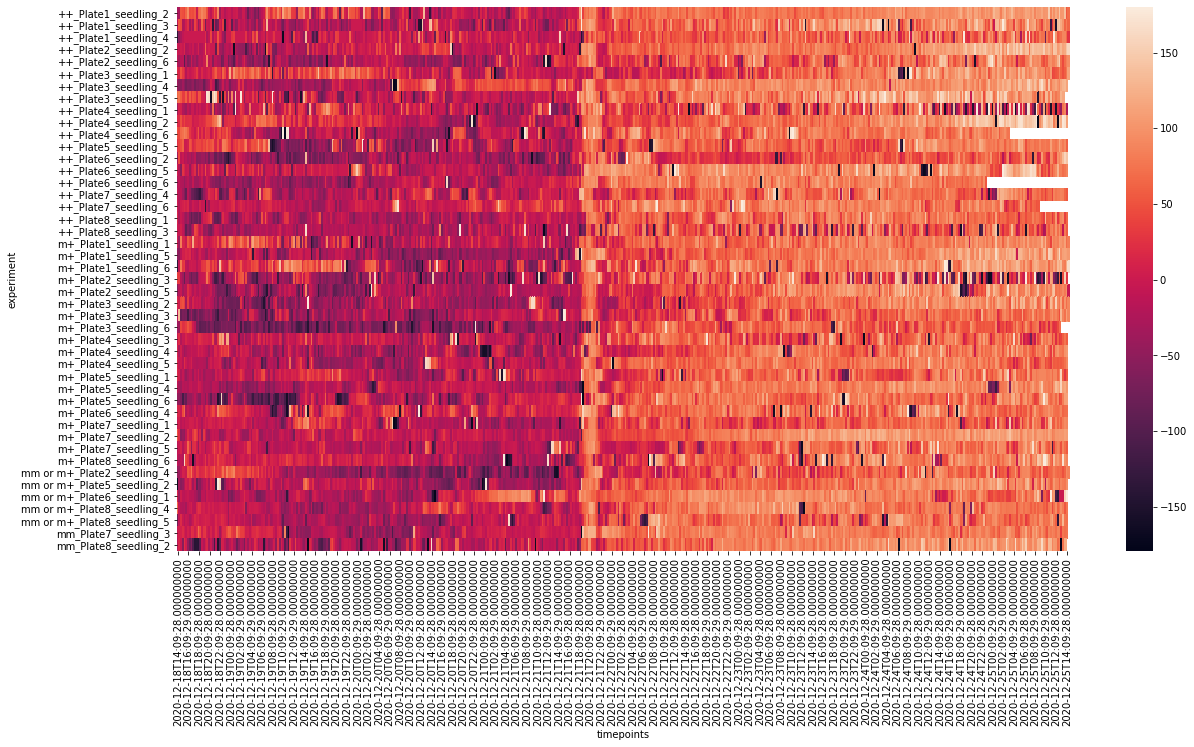

In [16]:
plt.figure(figsize=(20,10))
flights = DF_degrees.pivot("experiment", "timepoints", "degree")
ax = sns.heatmap(flights, )
# dateformat = md.DateFormatter("%H:%M:%S")
# ax.xaxis.set_major_formatter(dateformat)
plt.savefig(seedling_results / "heatmap_time.png", dpi=300, bbox_inches = 'tight')    

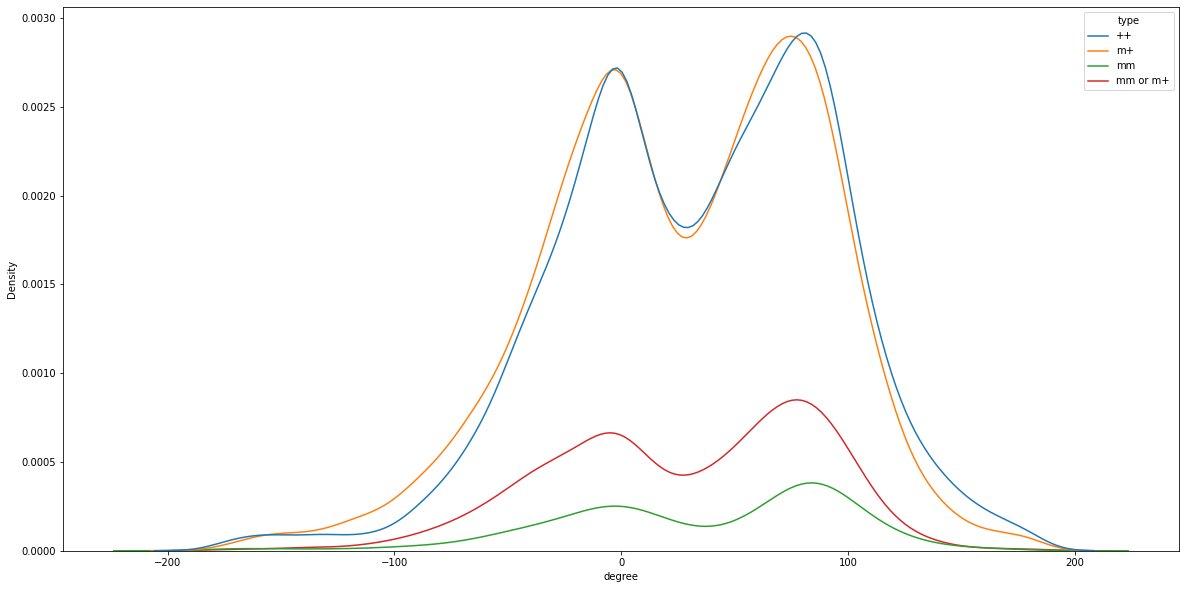

In [17]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(data=DF_degrees, x="degree", hue='type')
plt.savefig(seedling_results / "density_degrees.png", dpi=300, bbox_inches = 'tight')    

# Lineplot

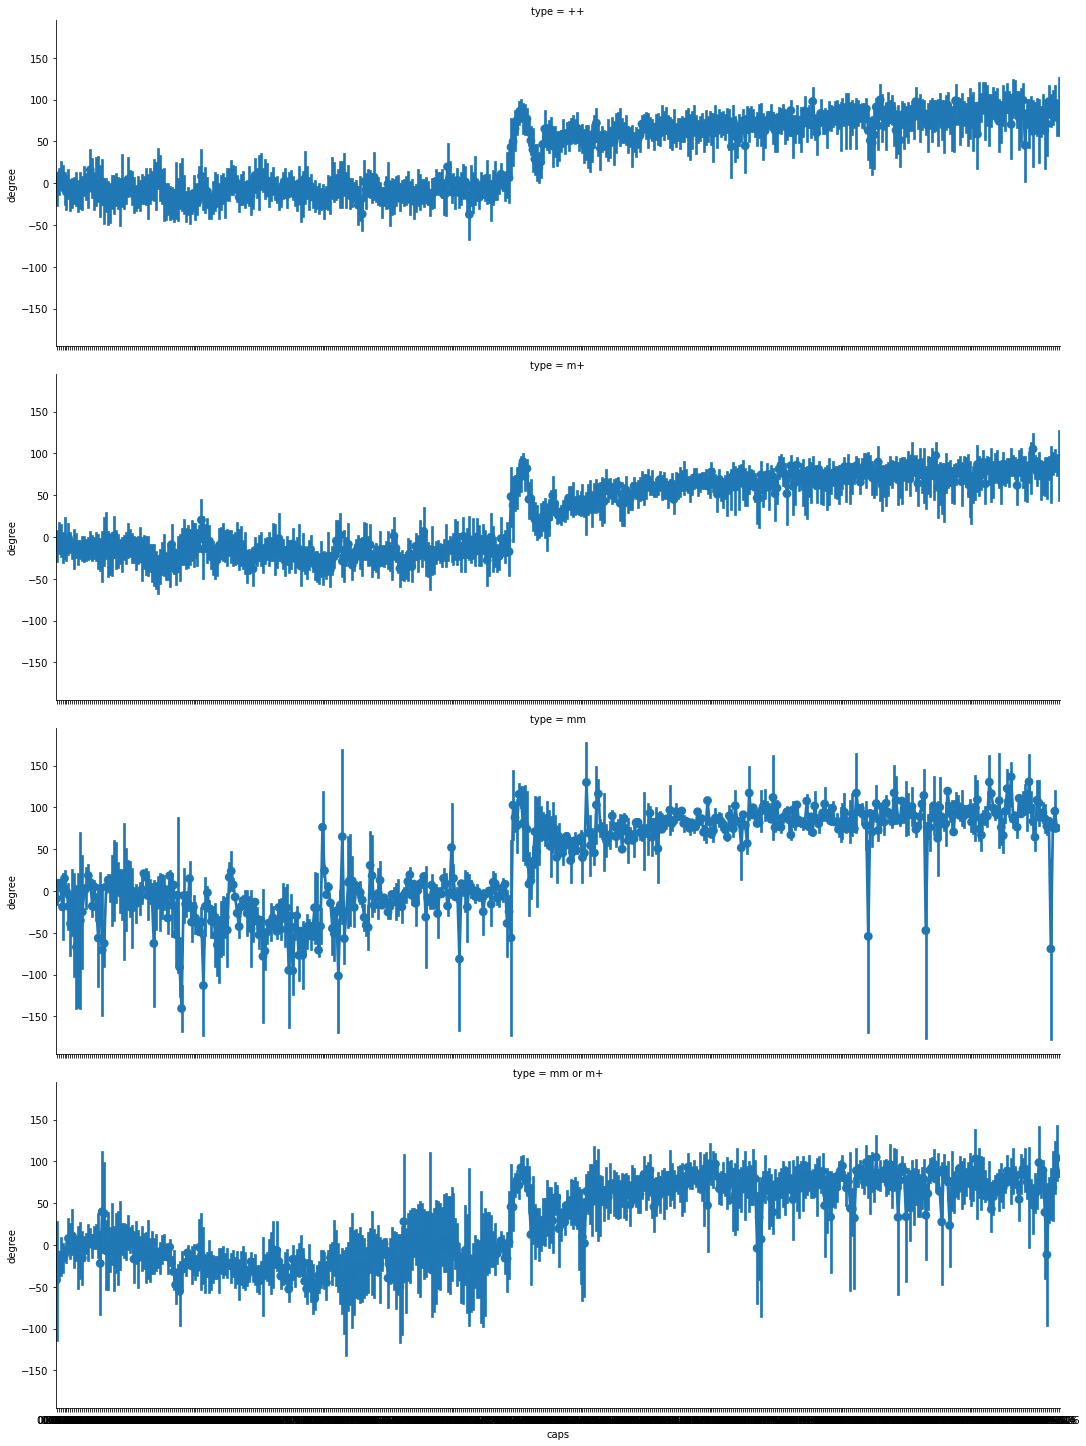

In [27]:
sns.catplot(kind='point', data=DF_degrees, x='caps', y='degree', row='type', aspect=3)
plt.savefig(seedling_results / "Pointplot.png", dpi=300, bbox_inches = 'tight') 

In [12]:
ks = {i:ix+1 for ix, i in enumerate(set(DF_degrees.experiment))}
# ks

In [13]:
DF_degrees['exp'] = DF_degrees.experiment.apply(lambda x: ks[x])

In [14]:
DF_degrees

,ntype,type,experiment,caps,timepoints,y_degrees_label,x_degrees_label,degree,euclidean (mm),time_dif (s),speed (mm/s),speed (mm/h),exp
0,1,++,type_1_++_2020-12-18_plate1_seedling_2,000-001,2020-12-18 14:09:28,184.952204,475.622650,-30.963757,0.047859,1200,0.000040,0.143576,9
1,1,++,type_1_++_2020-12-18_plate1_seedling_2,001-002,2020-12-18 14:29:28,184.310361,476.793071,-26.565051,0.048941,1200,0.000041,0.146824,9
2,1,++,type_1_++_2020-12-18_plate1_seedling_2,002-003,2020-12-18 14:49:28,184.536894,477.812469,51.842773,0.048711,1200,0.000041,0.146134,9
3,1,++,type_1_++_2020-12-18_plate1_seedling_2,003-004,2020-12-18 15:09:29,186.047114,479.133912,47.290610,0.096806,1201,0.000081,0.290177,9
4,1,++,type_1_++_2020-12-18_plate1_seedling_2,004-005,2020-12-18 15:29:29,187.406312,480.493110,39.805571,0.042736,1200,0.000036,0.128209,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,4,mm or m+,type_4_mm or m+_Plate8_seedling_5,500-501,2020-12-25 12:49:29,390.165248,690.403812,90.000000,0.033705,1199,0.000028,0.101200,41
501,4,mm or m+,type_4_mm or m+_Plate8_seedling_5,501-502,2020-12-25 13:09:28,391.328077,690.558856,77.471192,0.051791,1201,0.000043,0.155244,41
502,4,mm or m+,type_4_mm or m+_Plate8_seedling_5,502-503,2020-12-25 13:29:28,392.594269,690.197086,132.273689,0.055674,1200,0.000046,0.167021,41
503,4,mm or m+,type_4_mm or m+_Plate8_seedling_5,503-504,2020-12-25 13:49:29,393.627895,689.783636,77.471192,0.034527,1199,0.000029,0.103669,41


# Making 3d plot

In [ ]:
# %matplotlib qt

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for name, df in DF_degrees.groupby(['exp']):
    # dates_formatted = [pd.to_datetime(d) for d in df['timepoints'].tolist() ]
    x = df['exp']
    y = df.index
    z = df['degree']

    ax.set_xlabel("exp")
    ax.set_ylabel("time")
    ax.set_zlabel("degree")

    ax.scatter(x, y, z)

    # ax.yaxis.set_ticks(x)
    # ax.yaxis.set_ticklabels(dates_formatted);

plt.show()

In [15]:
DF_data.insert(loc=0, column='type', value=DF_data.experiment.apply(lambda x: x.split("_")[2]))
DF_data.insert(loc=0, column='ntype', value=DF_data.experiment.apply(lambda x: x.split("_")[1]))

In [18]:
DF_degrees

,ntype,type,experiment,caps,timepoints,y_degrees_label,x_degrees_label,degree,euclidean (mm),time_dif (s),speed (mm/s),speed (mm/h),exp
0,1,++,type_1_++_2020-12-18_plate1_seedling_2,000-001,2020-12-18 14:09:28,184.952204,475.622650,-30.963757,0.047859,1200,0.000040,0.143576,9
1,1,++,type_1_++_2020-12-18_plate1_seedling_2,001-002,2020-12-18 14:29:28,184.310361,476.793071,-26.565051,0.048941,1200,0.000041,0.146824,9
2,1,++,type_1_++_2020-12-18_plate1_seedling_2,002-003,2020-12-18 14:49:28,184.536894,477.812469,51.842773,0.048711,1200,0.000041,0.146134,9
3,1,++,type_1_++_2020-12-18_plate1_seedling_2,003-004,2020-12-18 15:09:29,186.047114,479.133912,47.290610,0.096806,1201,0.000081,0.290177,9
4,1,++,type_1_++_2020-12-18_plate1_seedling_2,004-005,2020-12-18 15:29:29,187.406312,480.493110,39.805571,0.042736,1200,0.000036,0.128209,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,4,mm or m+,type_4_mm or m+_Plate8_seedling_5,500-501,2020-12-25 12:49:29,390.165248,690.403812,90.000000,0.033705,1199,0.000028,0.101200,41
501,4,mm or m+,type_4_mm or m+_Plate8_seedling_5,501-502,2020-12-25 13:09:28,391.328077,690.558856,77.471192,0.051791,1201,0.000043,0.155244,41
502,4,mm or m+,type_4_mm or m+_Plate8_seedling_5,502-503,2020-12-25 13:29:28,392.594269,690.197086,132.273689,0.055674,1200,0.000046,0.167021,41
503,4,mm or m+,type_4_mm or m+_Plate8_seedling_5,503-504,2020-12-25 13:49:29,393.627895,689.783636,77.471192,0.034527,1199,0.000029,0.103669,41


In [22]:

groups = []
for name, group in DF_degrees.groupby('experiment'):
    groups.append(group)
    

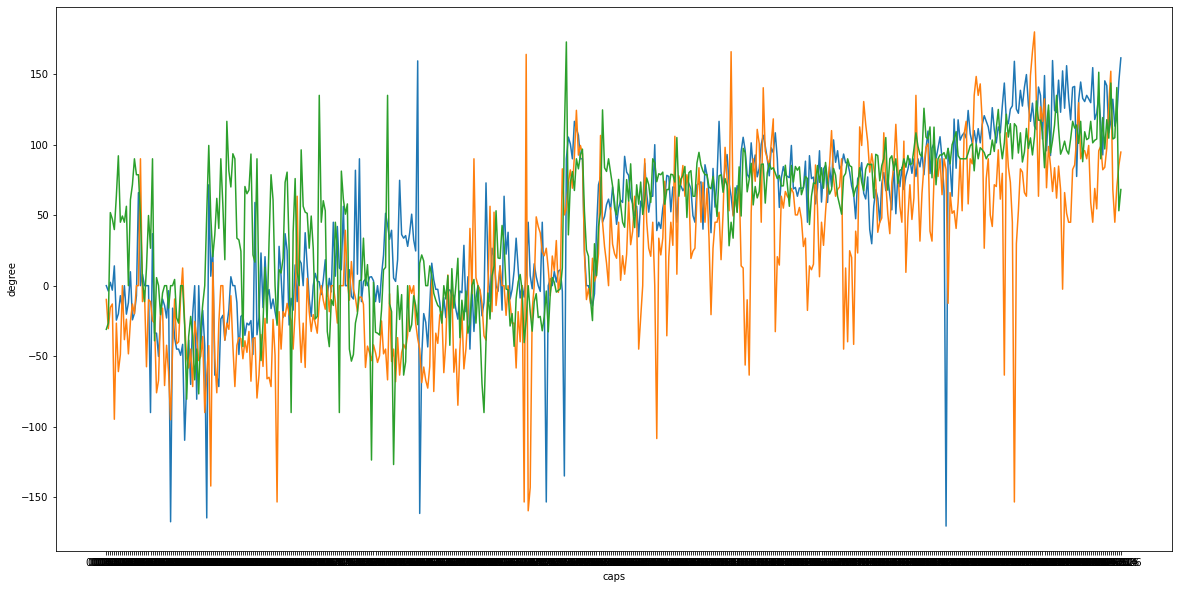

In [24]:
fig, ax = plt.subplots(figsize=(20,10))

for group in groups[:3]:
    sns.lineplot(data=group, x="caps", y='degree')